In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from important_plots import *

In [2]:
data = pd.read_csv("Iot/IoTProcessed_Data.csv")
data.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


In [3]:
#Removing redundant columns
redundant_columns = ['Fan_actuator_OFF', 'Watering_plant_pump_OFF', 'Water_pump_actuator_OFF']
cleaned_data = data.drop(redundant_columns, axis=1)

#Converting columns to boolean
bool_columns = ['Fan_actuator_ON', 'Watering_plant_pump_ON', 'Water_pump_actuator_ON']
cleaned_data[bool_columns] = cleaned_data[bool_columns].astype(bool)

#Converting date column to date time data type
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

#Extracting month and time from date and drop date column

cleaned_data.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_ON,Watering_plant_pump_ON,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,True,False,False
1,2024-02-08 06:15:00,41,59,100,255,255,255,True,False,False
2,2024-02-08 06:20:00,41,62,100,255,255,255,True,False,False
3,2024-02-08 06:05:00,40,60,100,255,255,255,True,False,False
4,2024-02-08 06:00:00,39,61,100,255,255,255,True,False,False


Distribution of Temperature, Humidity and Water level

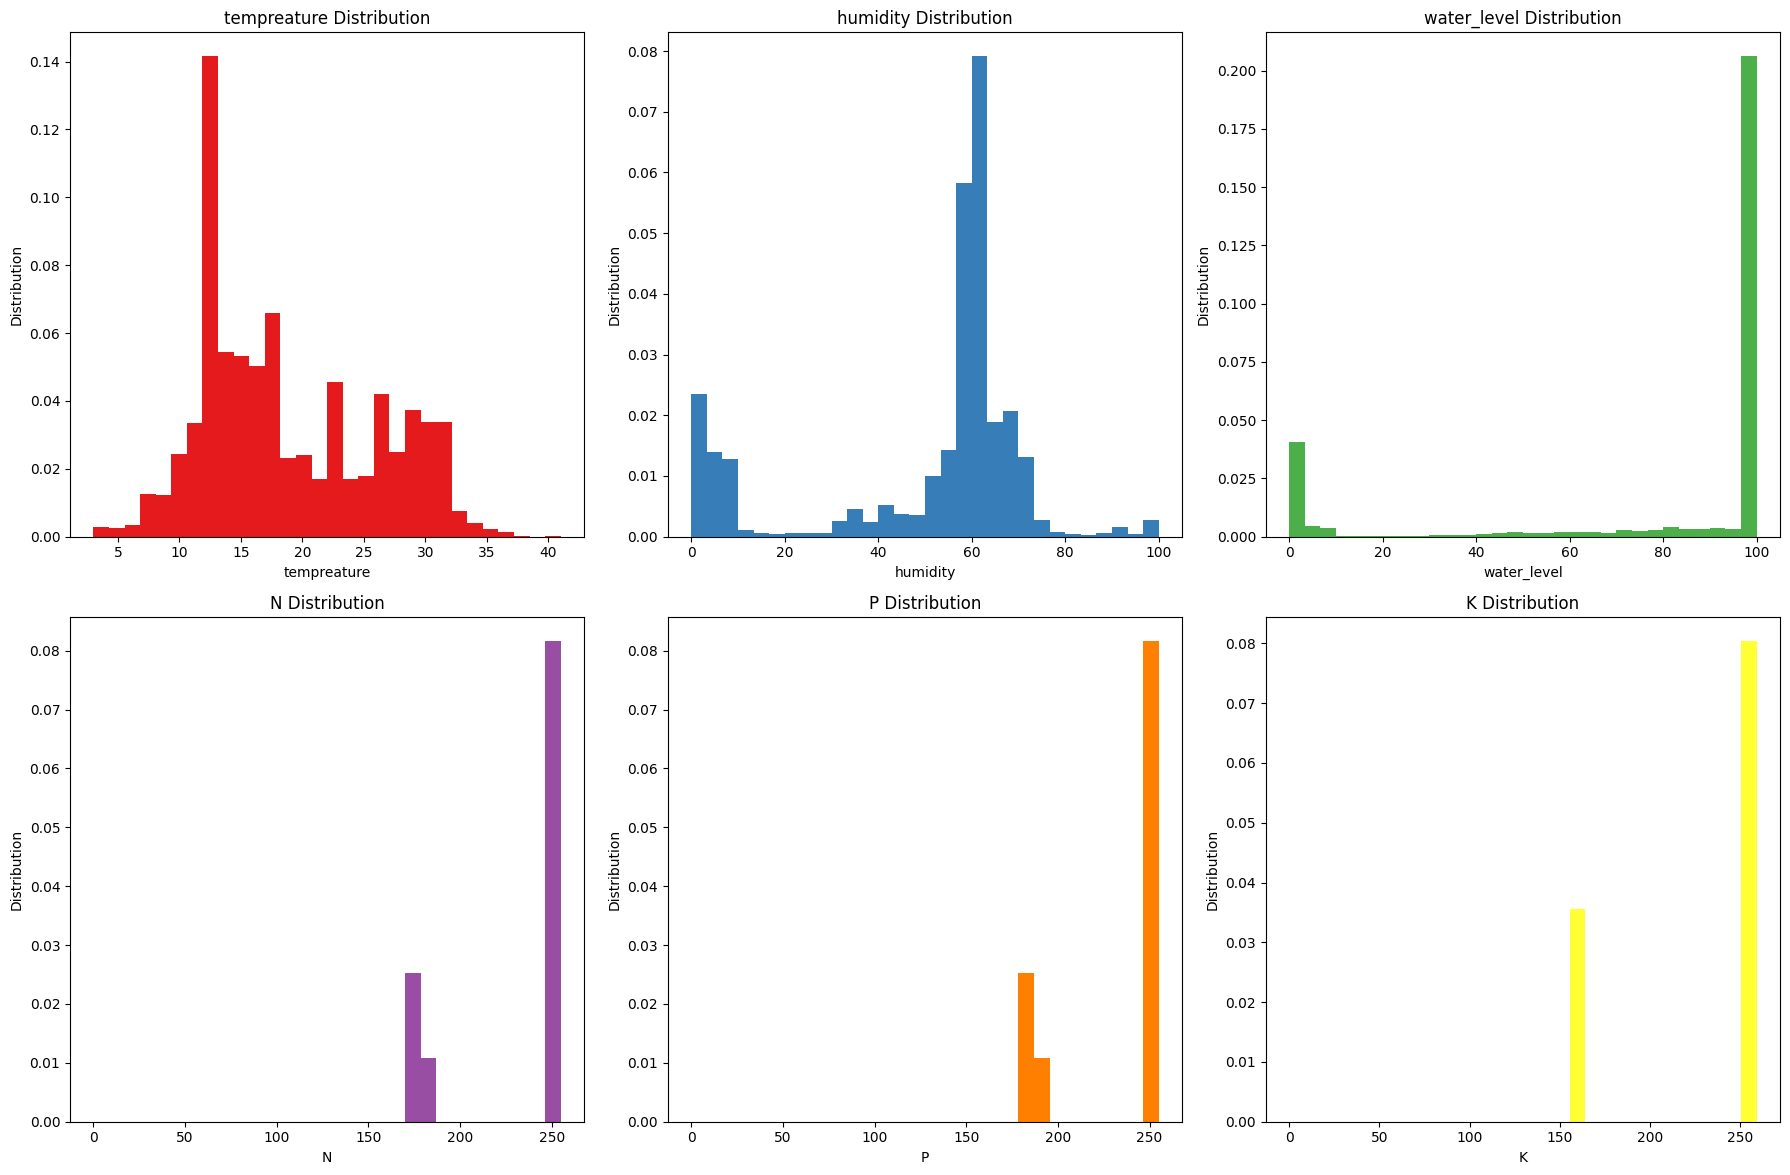

In [4]:
numeric_columns = cleaned_data.select_dtypes(include=['number'])

plot_features(cleaned_data, *numeric_columns)

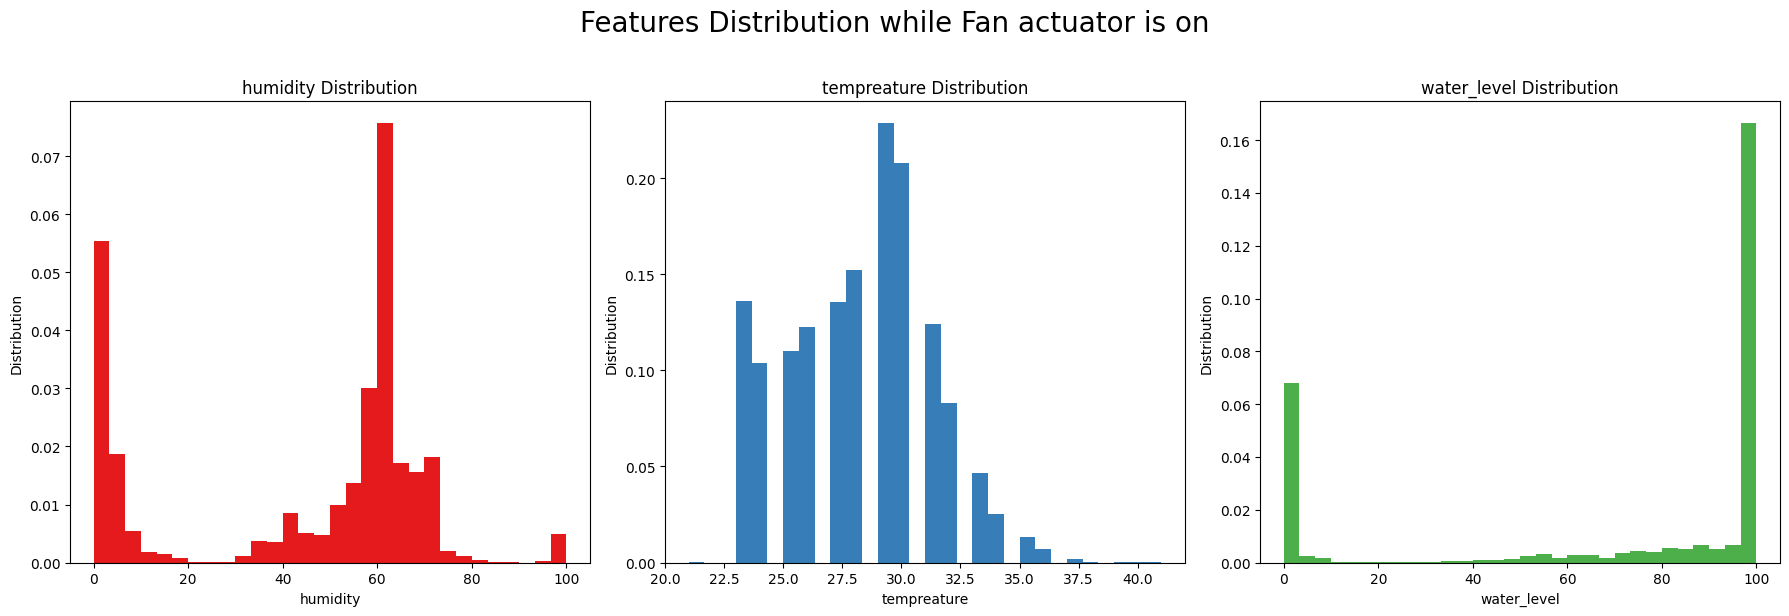

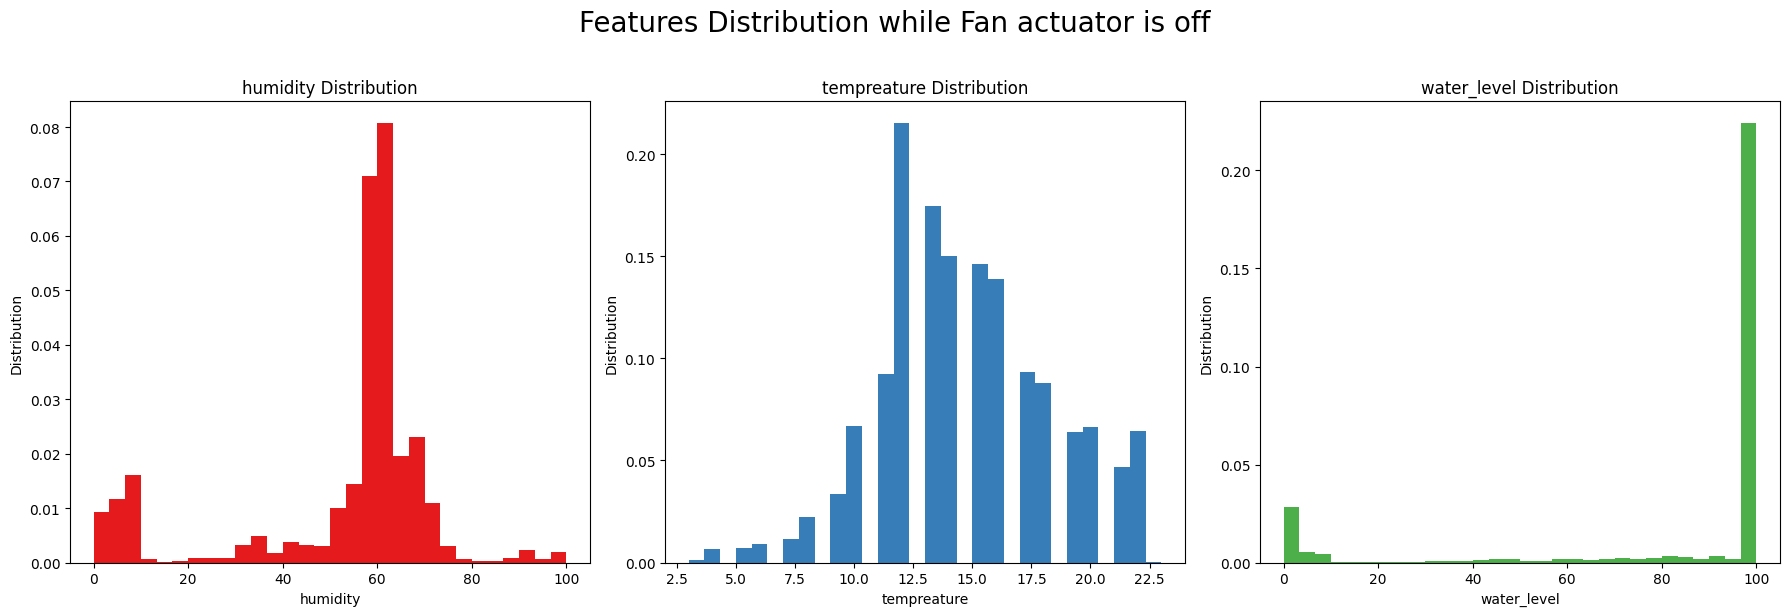

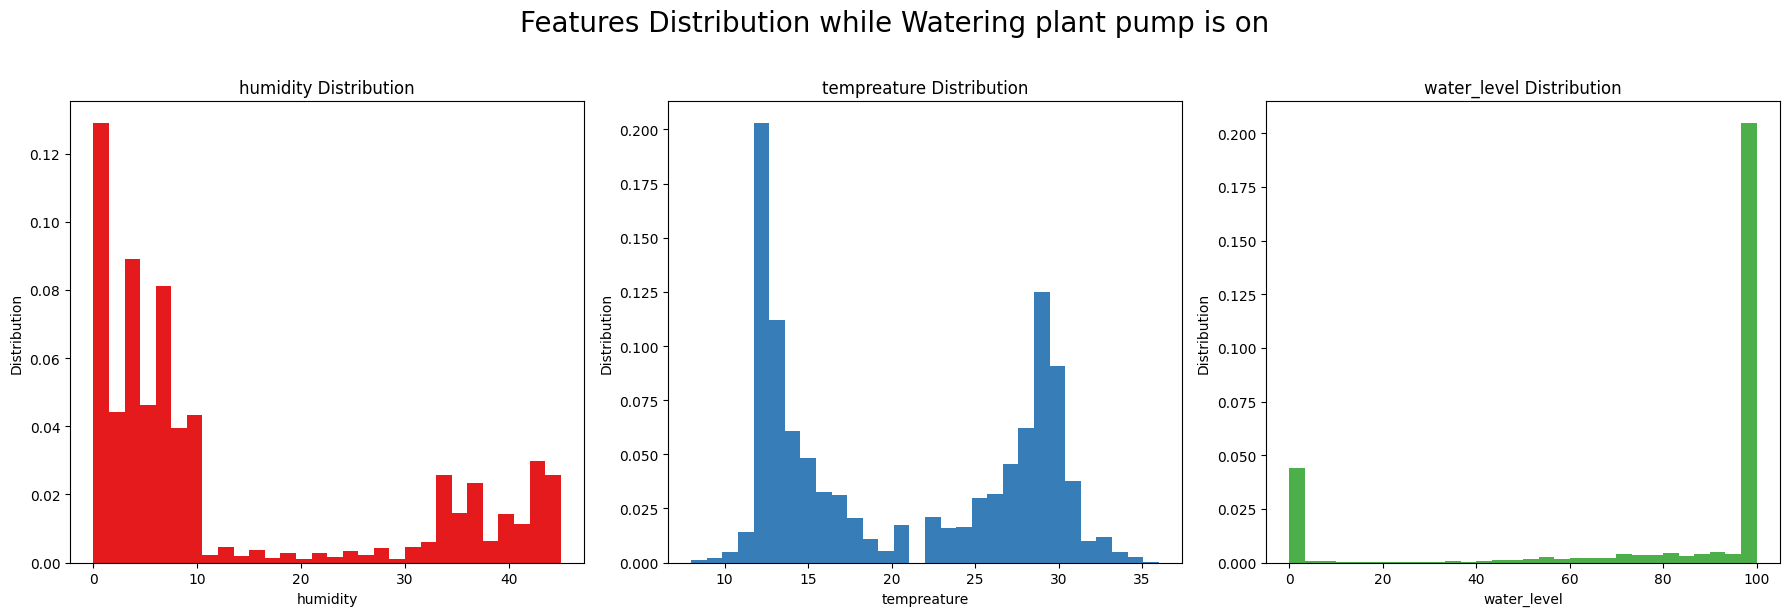

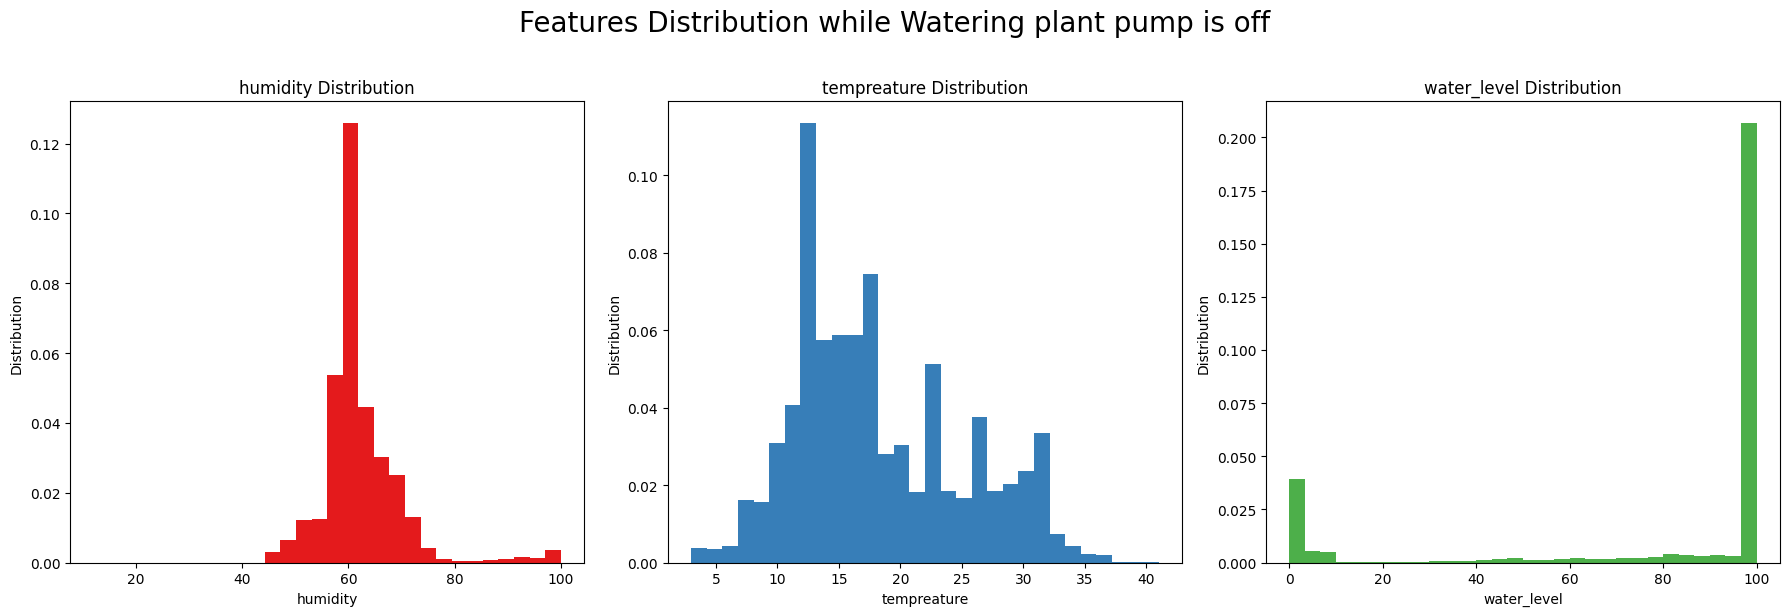

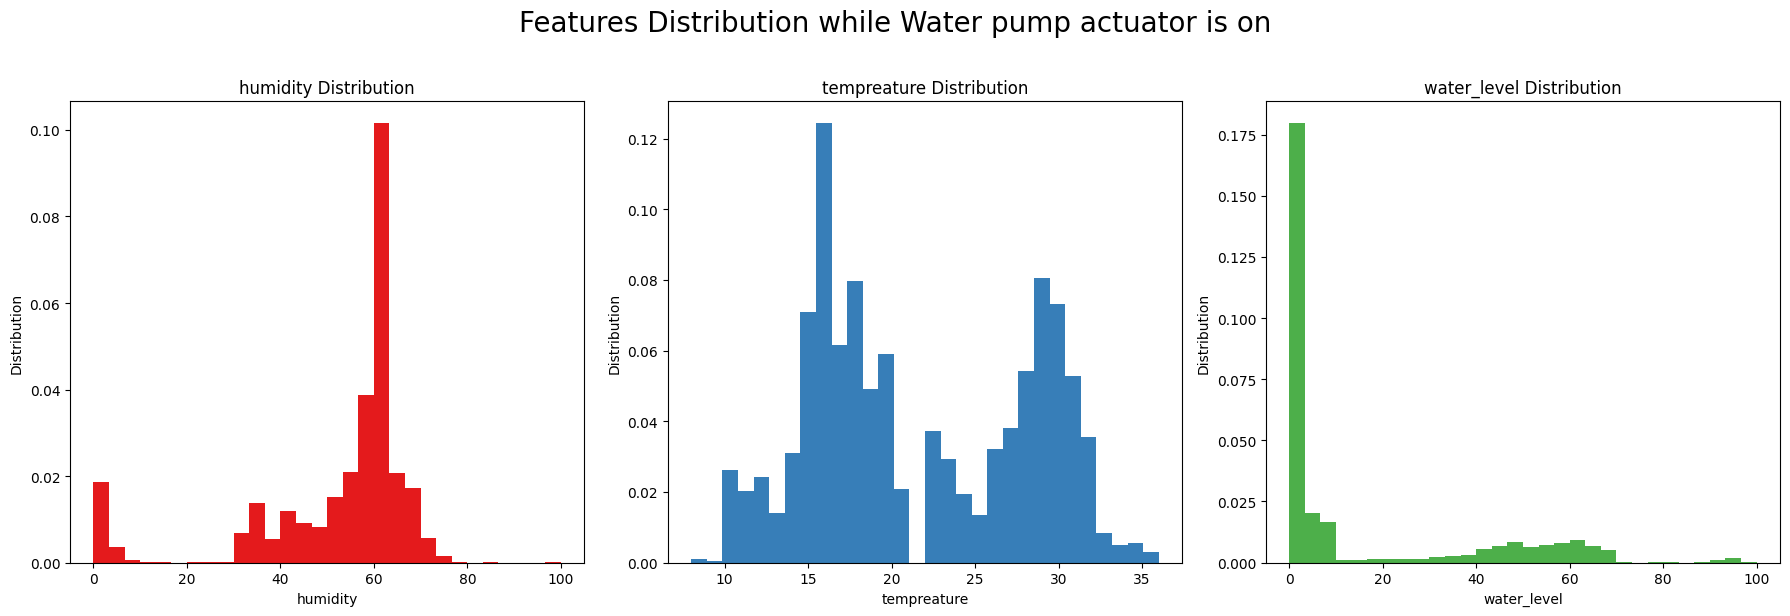

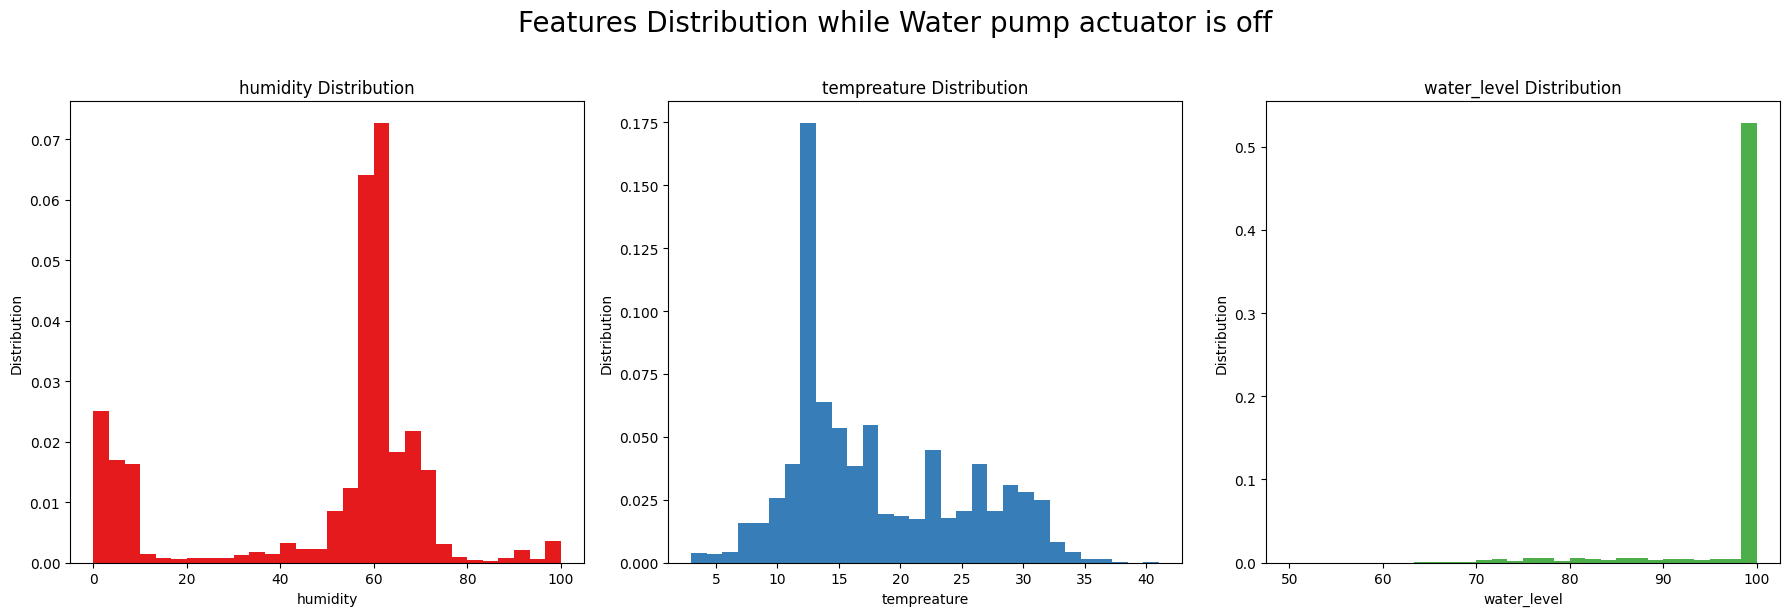

In [5]:
conditions_columns = ['Fan_actuator_ON', 'Watering_plant_pump_ON', 'Water_pump_actuator_ON']
features = ['humidity', 'tempreature', 'water_level']

for condition in conditions_columns:    
    plot_features(cleaned_data[cleaned_data[condition]], *features, title=f'Features Distribution while {condition[:-3].replace("_", " ")} is on')
    
    plot_features(cleaned_data[cleaned_data[condition] == False], *features, title=f'Features Distribution while {condition[:-3].replace("_", " ")} is off')


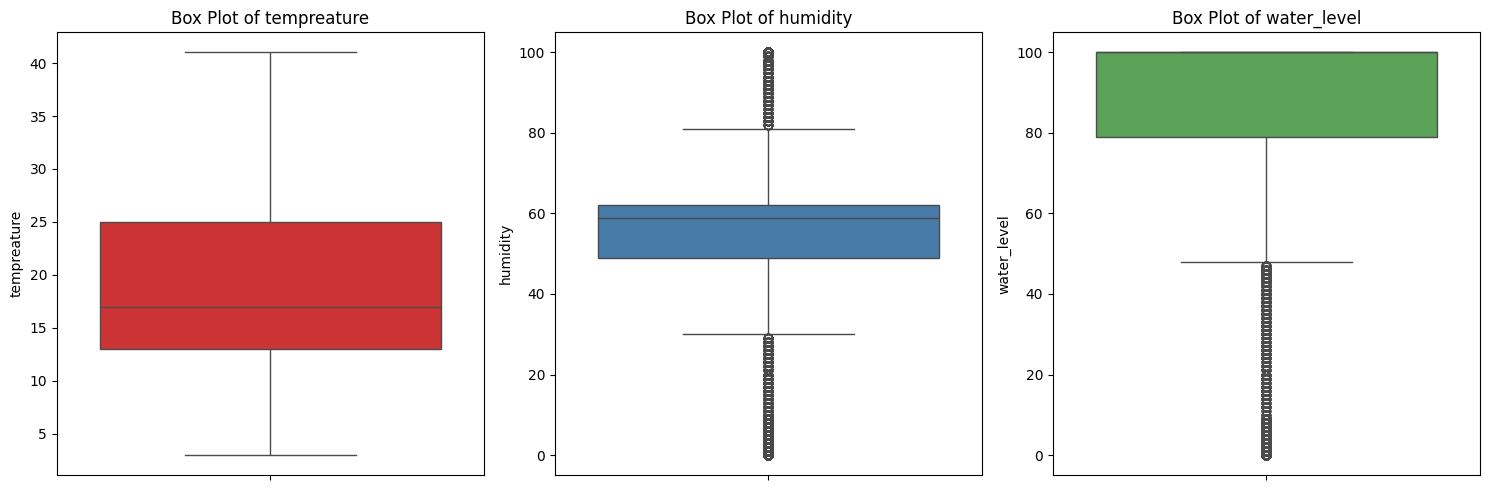

In [6]:
box_plot(cleaned_data,'tempreature', 'humidity', 'water_level')

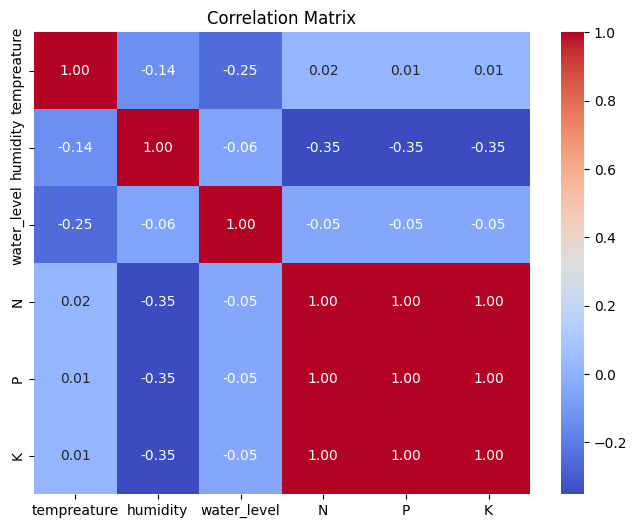

In [7]:
correlation(data, *numeric_columns)

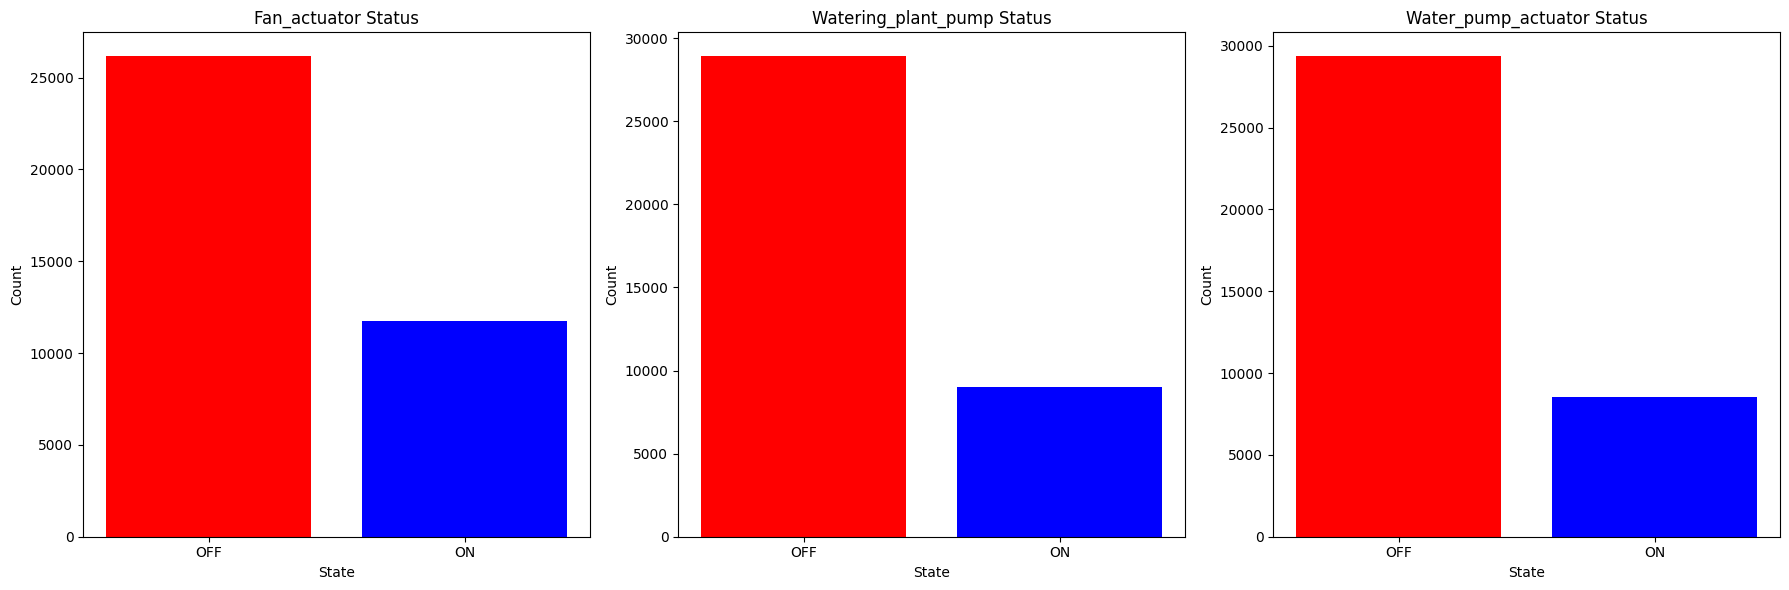

In [8]:
def plot_actuator_status(data, *actuators):
    fig, axes = plt.subplots(1, len(actuators), figsize=(18, 6))
    
    if len(actuators) == 1:
        axes = [axes]
    
    for i, actuator in enumerate(actuators):
        actuator_counts = data[actuator].value_counts()
        
        axes[i].bar(actuator_counts.index, actuator_counts.values, color=['red', 'blue'])
        axes[i].set_title(f'{actuator[:-3]} Status')
        axes[i].set_xlabel('State')
        axes[i].set_ylabel('Count')
        axes[i].set_xticks([1, 0])
        axes[i].set_xticklabels(['ON', 'OFF'])

    plt.tight_layout()
    plt.show()

plot_actuator_status(cleaned_data, 'Fan_actuator_ON', 'Watering_plant_pump_ON', 'Water_pump_actuator_ON')


Plotting Some Actuators with some features

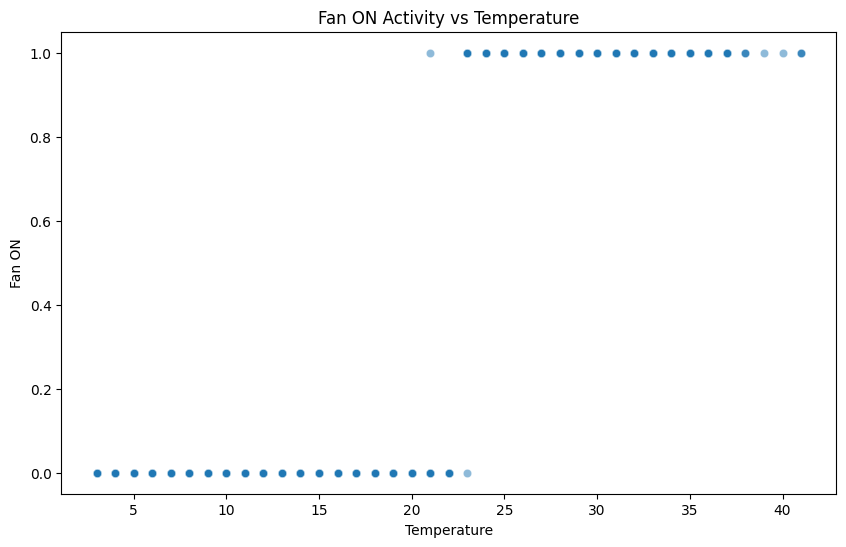

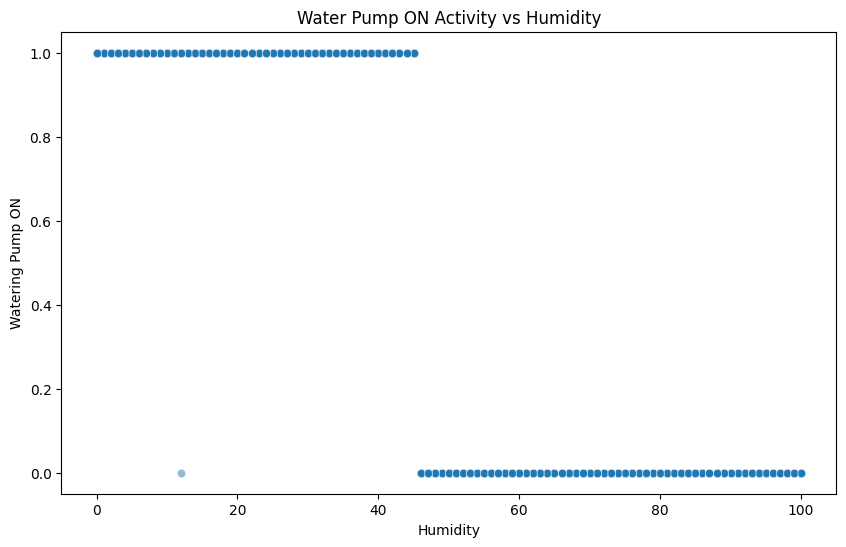

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_data['tempreature'], y=cleaned_data['Fan_actuator_ON'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Fan ON')
plt.title('Fan ON Activity vs Temperature')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_data['humidity'], y=cleaned_data['Watering_plant_pump_ON'], alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Watering Pump ON')
plt.title('Water Pump ON Activity vs Humidity')
plt.show()

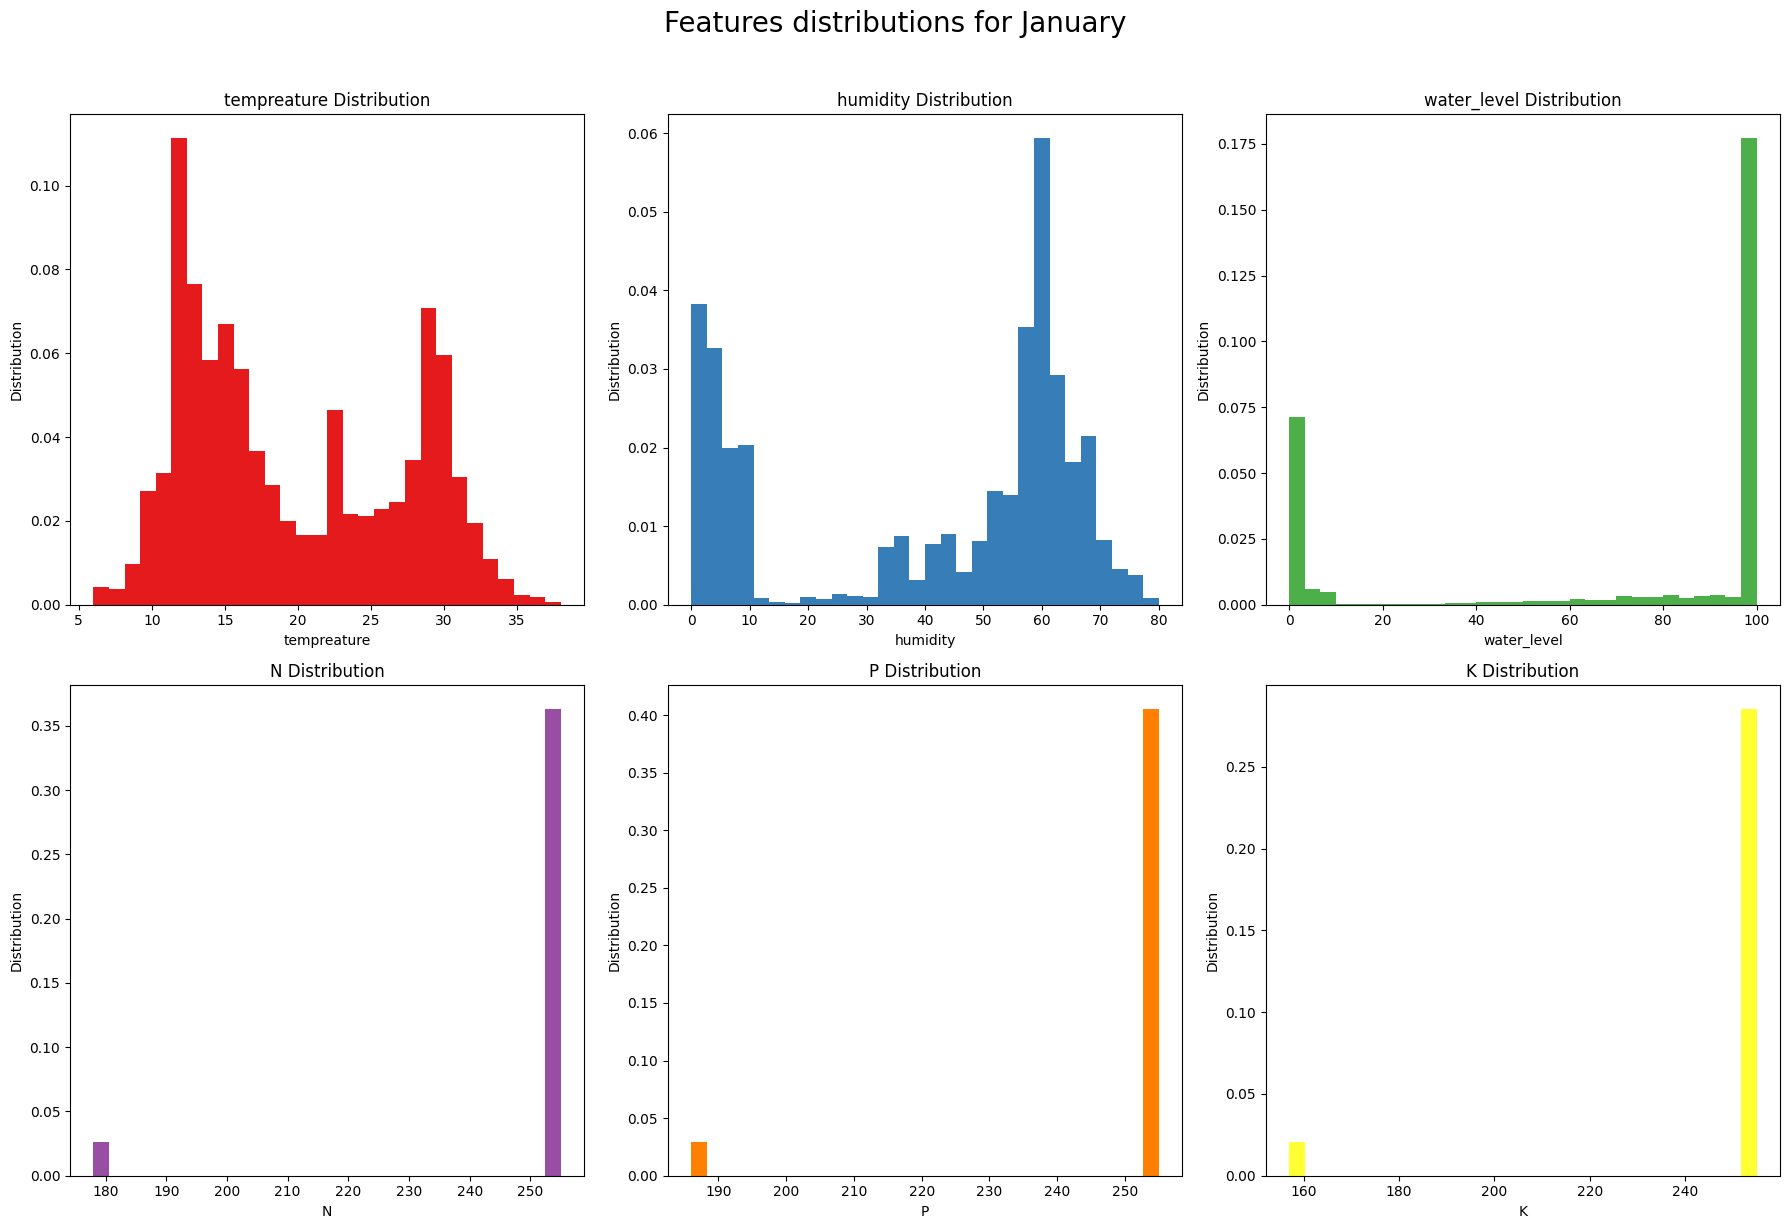

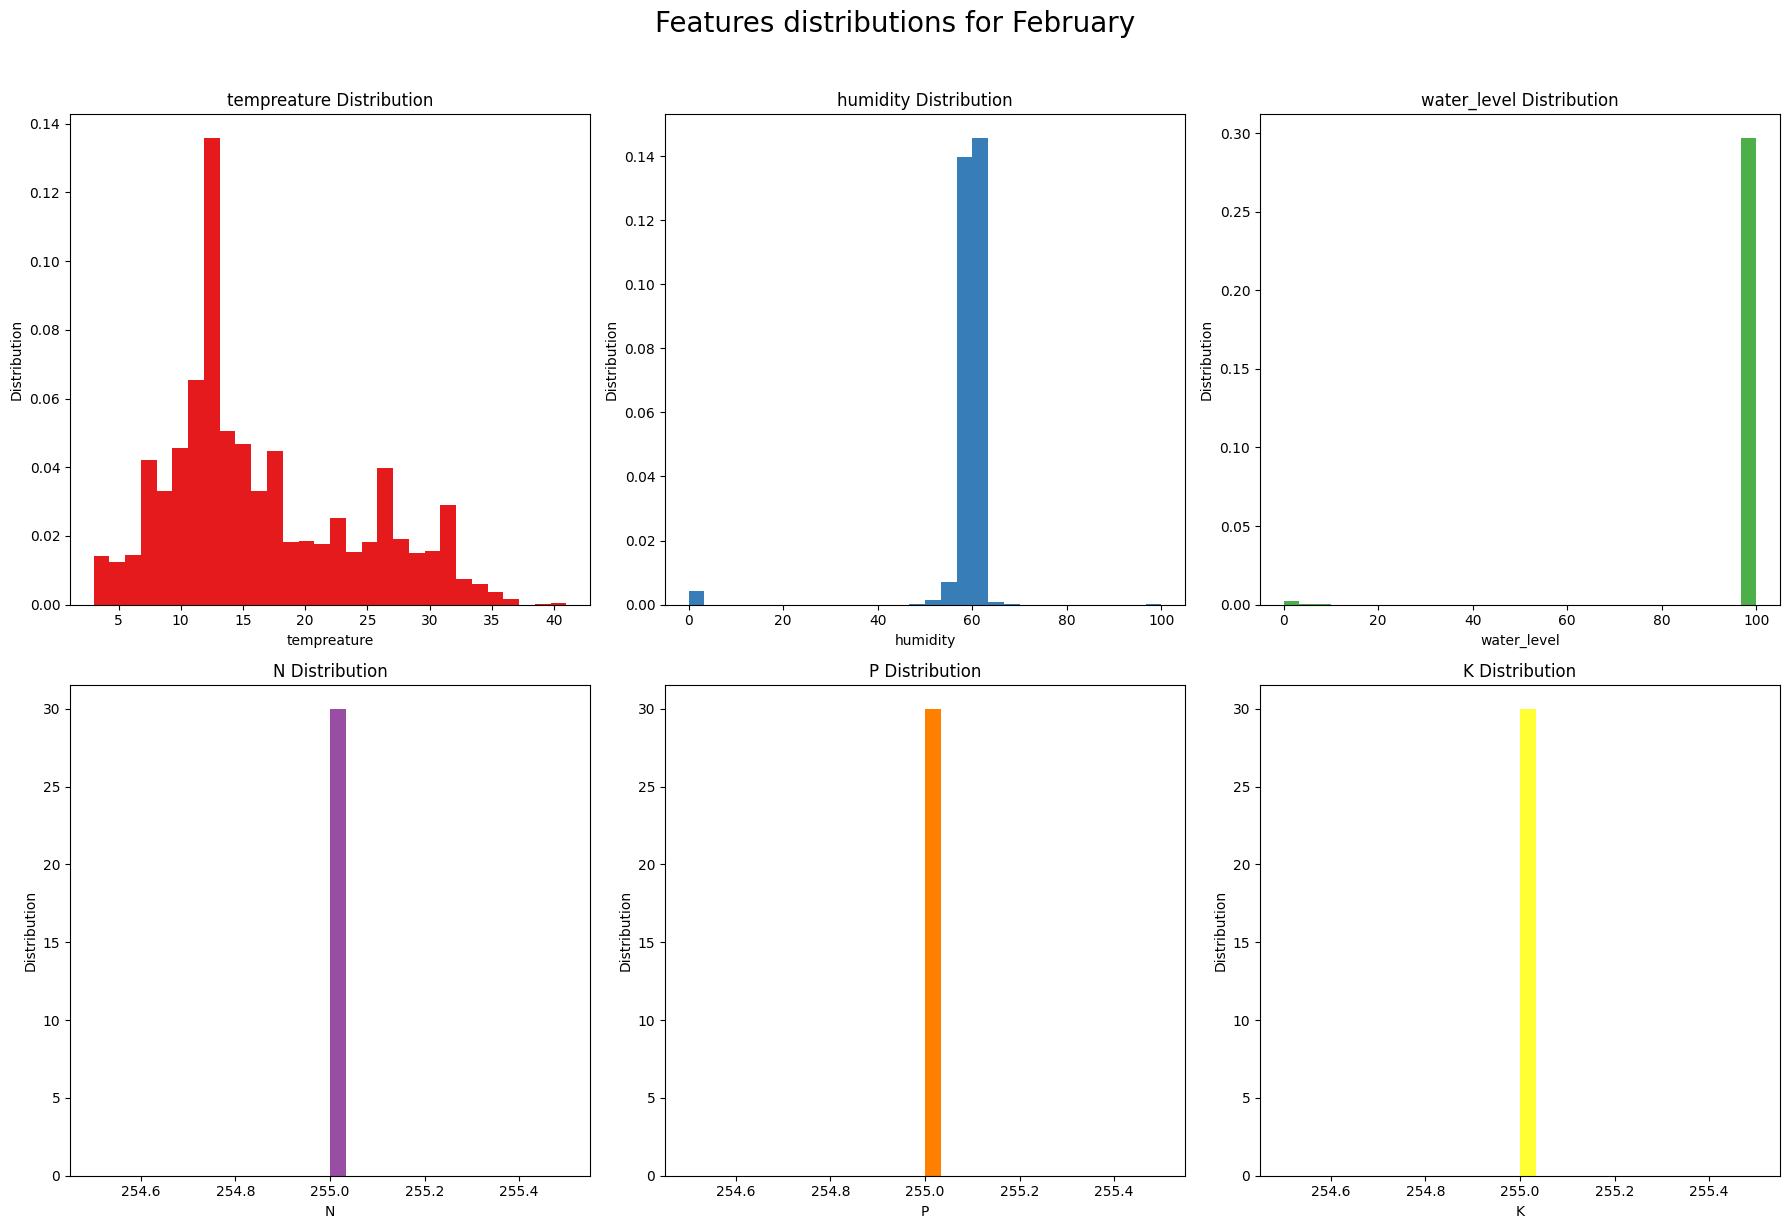

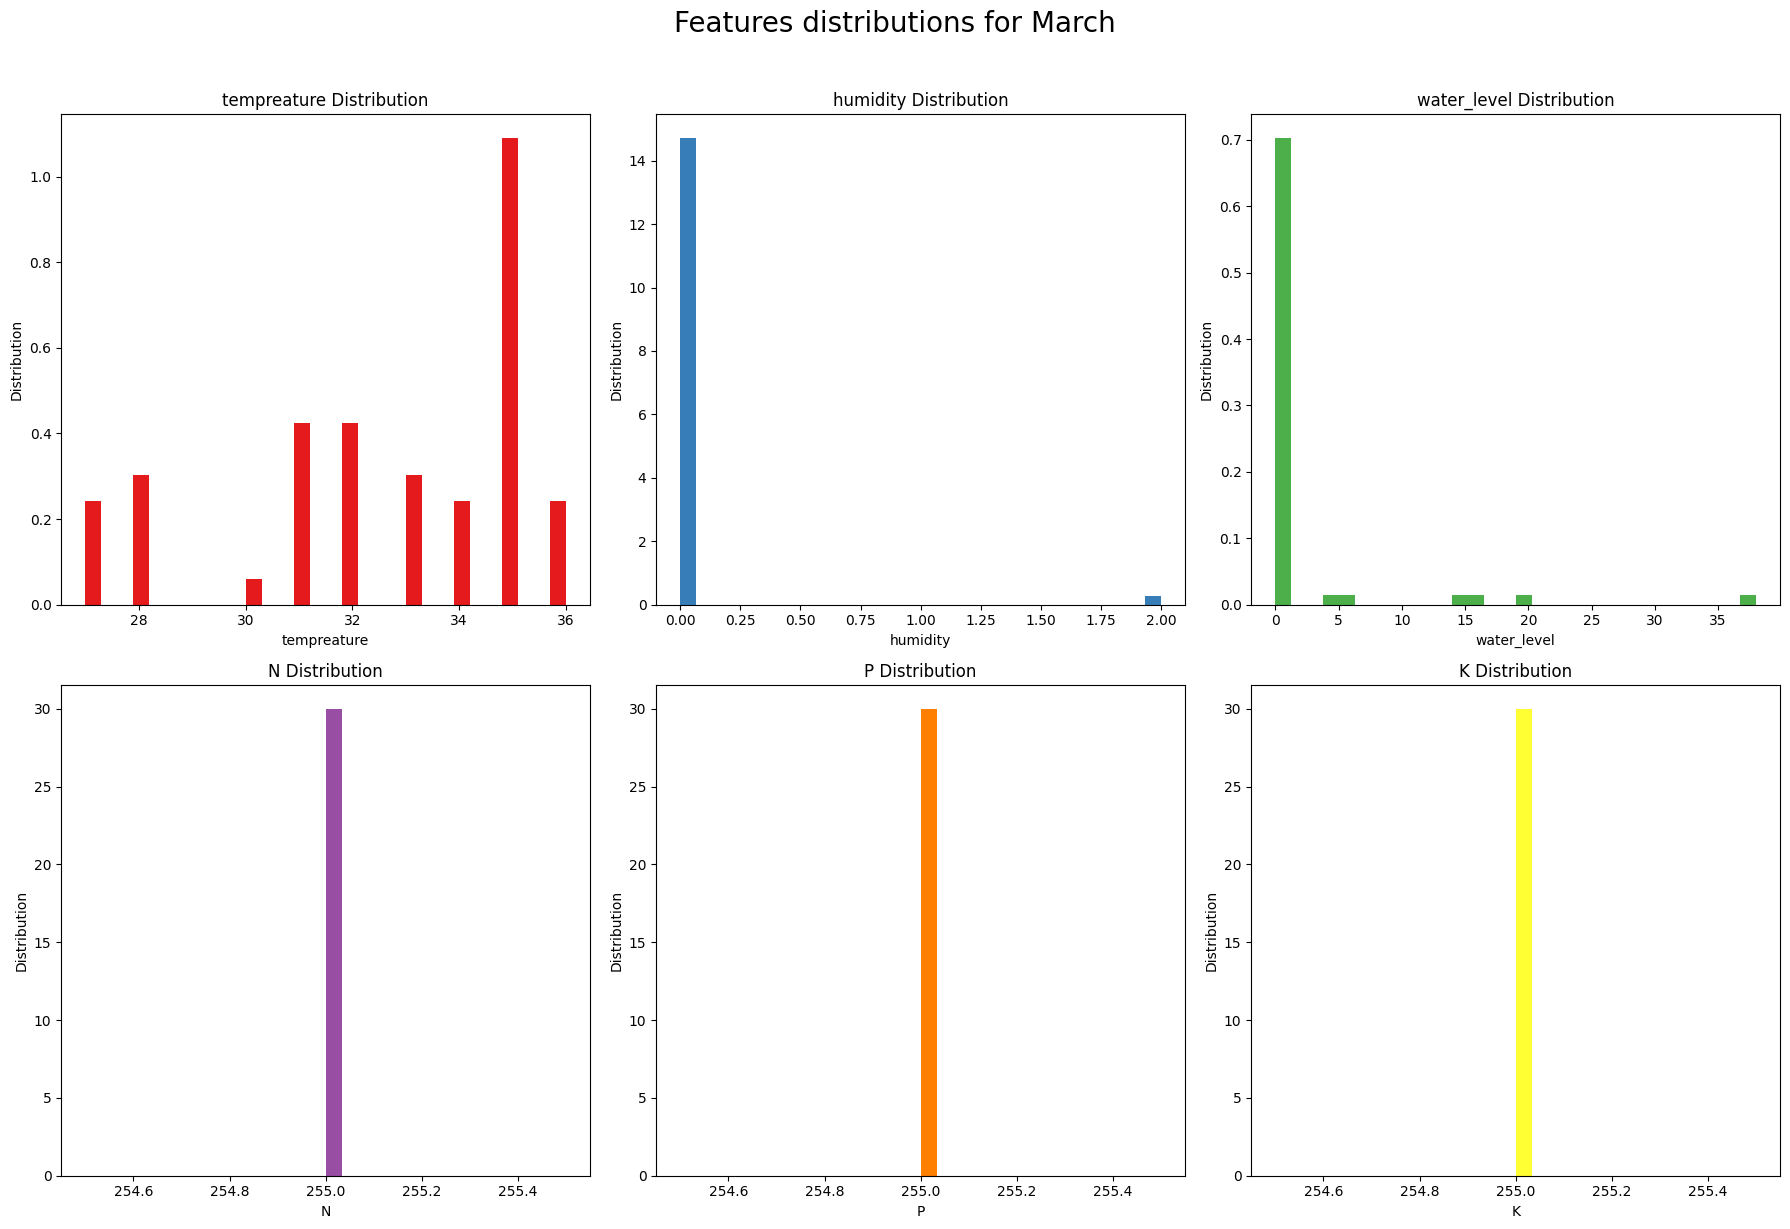

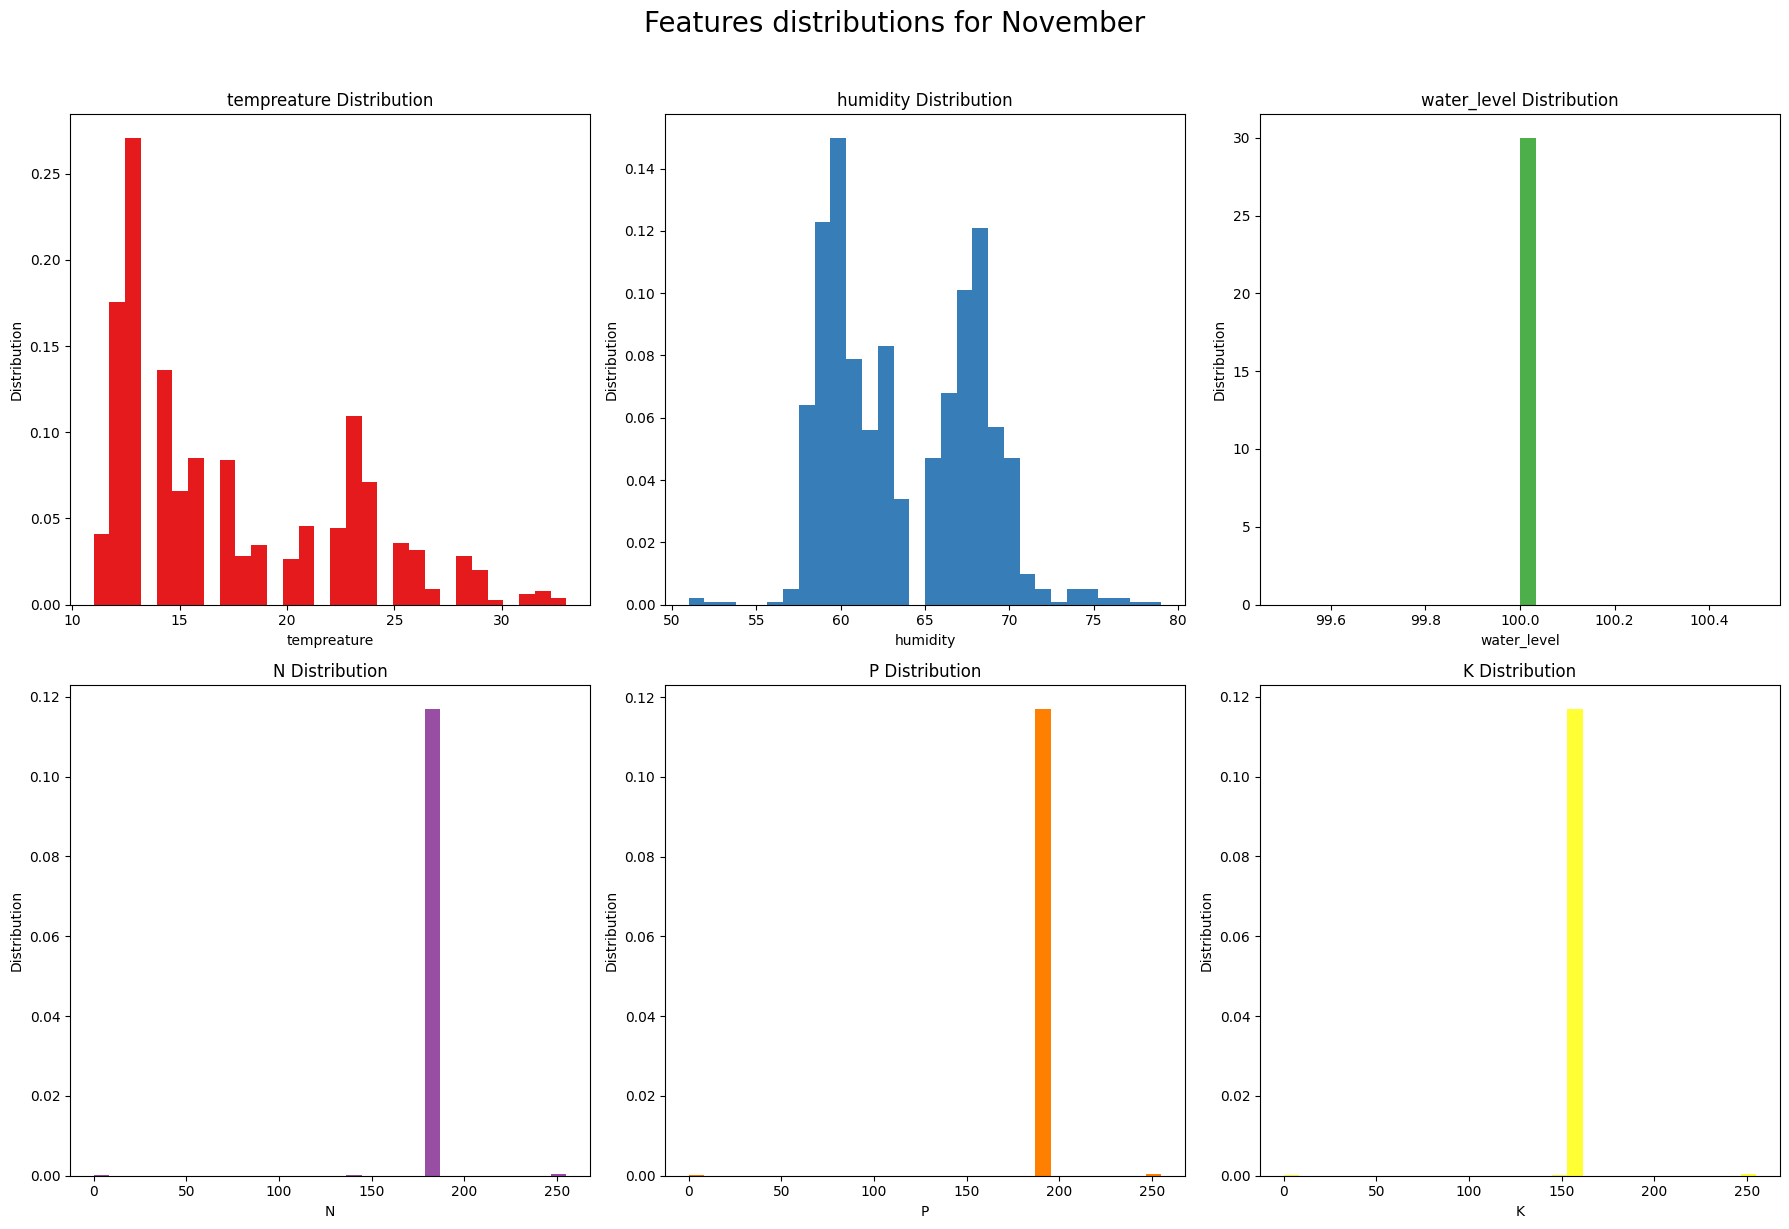

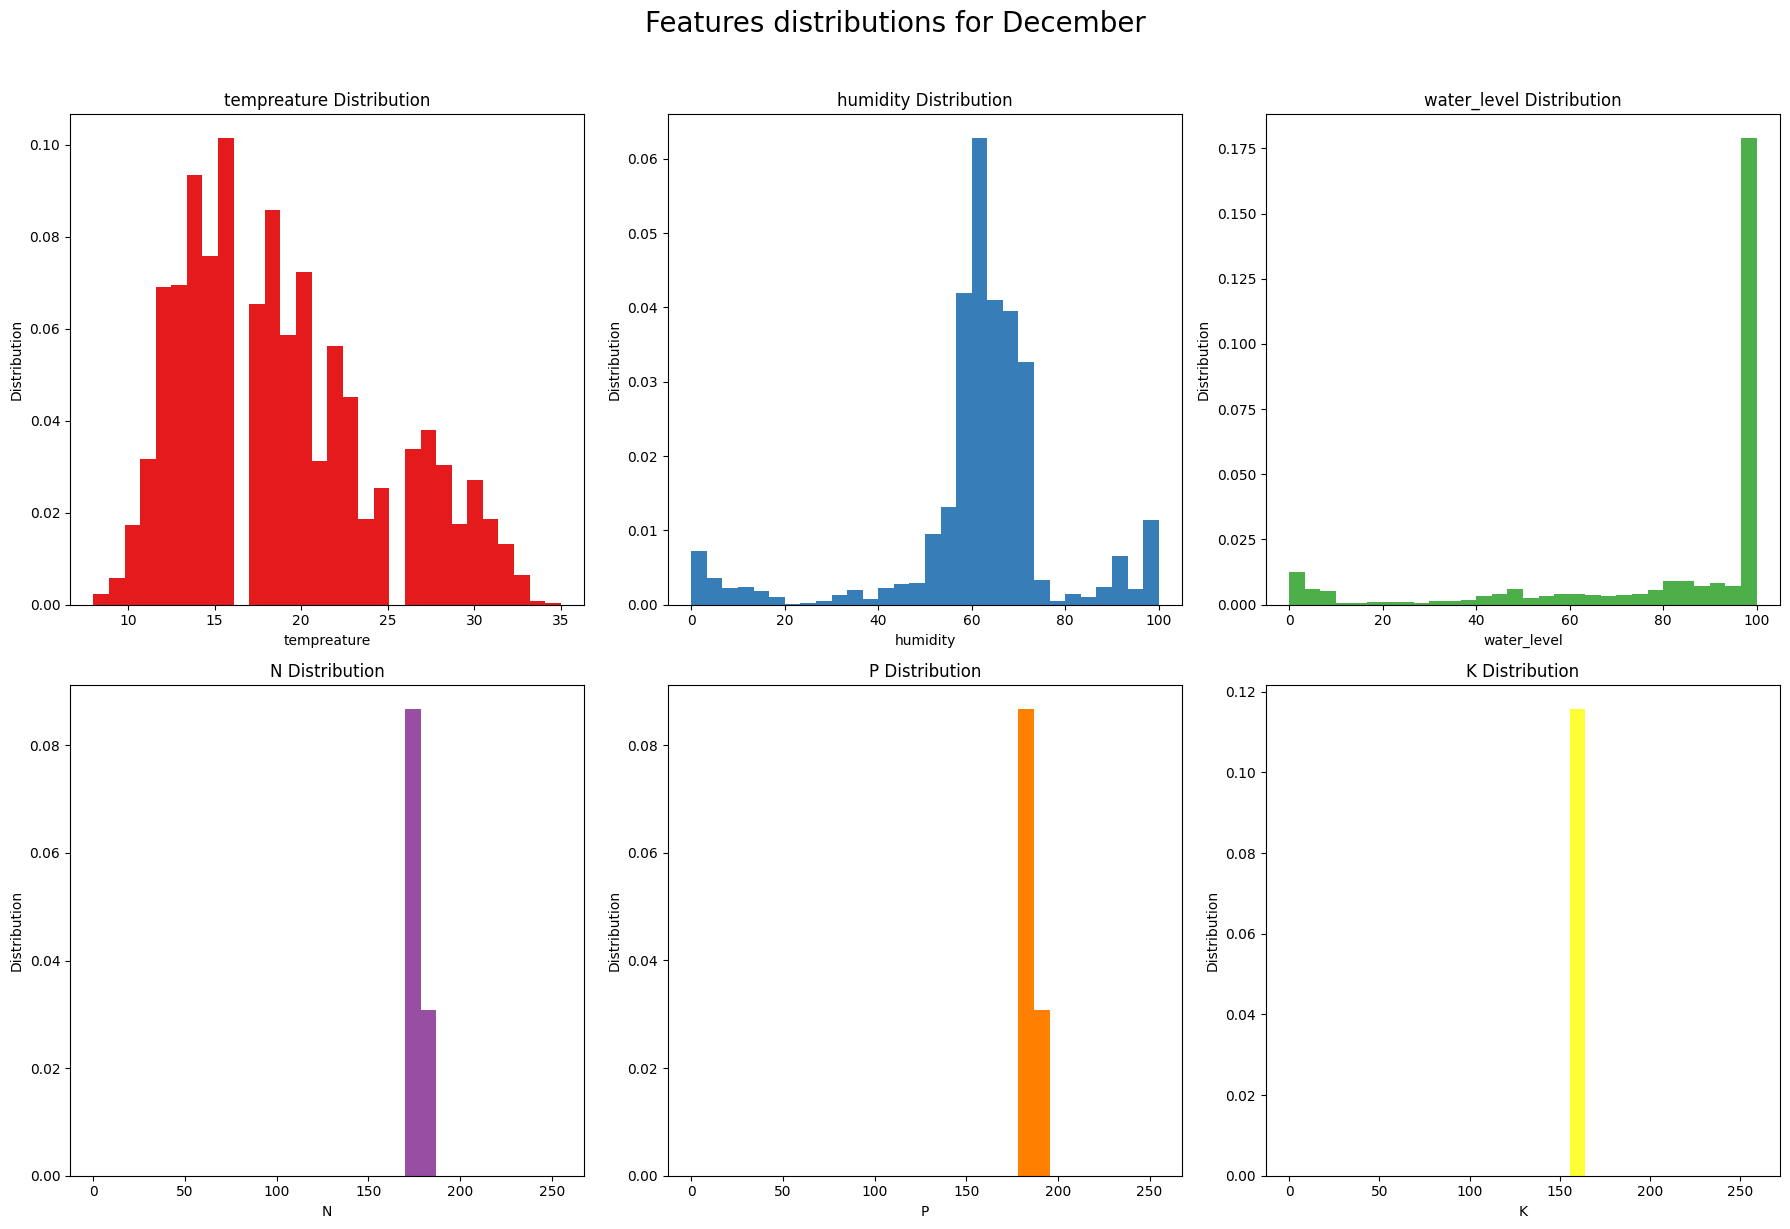

In [10]:
cleaned_data['month'] = cleaned_data['date'].dt.strftime('%B')

month_order = pd.date_range('2024-01-01', periods=12, freq='ME').strftime('%B')

for month in month_order:
    month_data = cleaned_data[cleaned_data['month'] == month]
    if not month_data.empty:
        plot_features(month_data, *numeric_columns, bins=30, title=f'Features distributions for {month}')

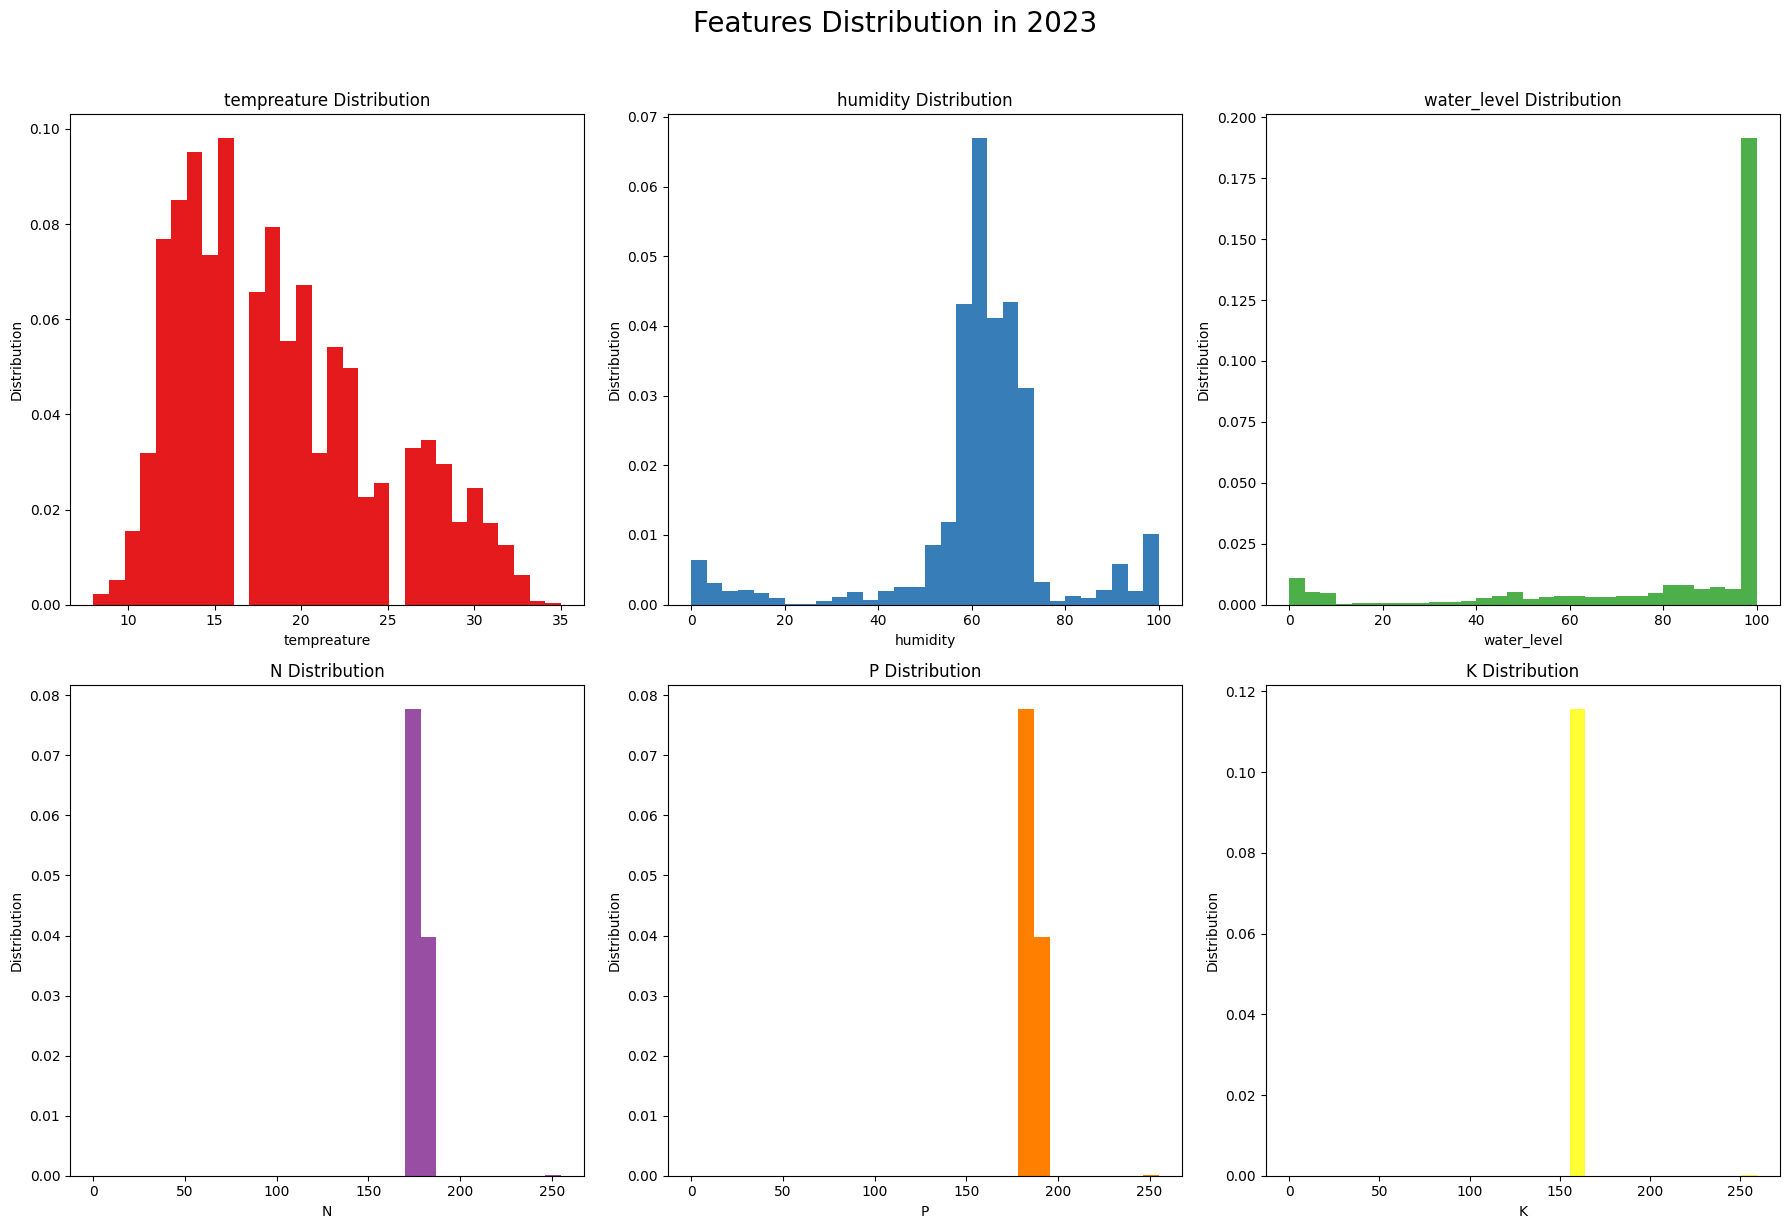

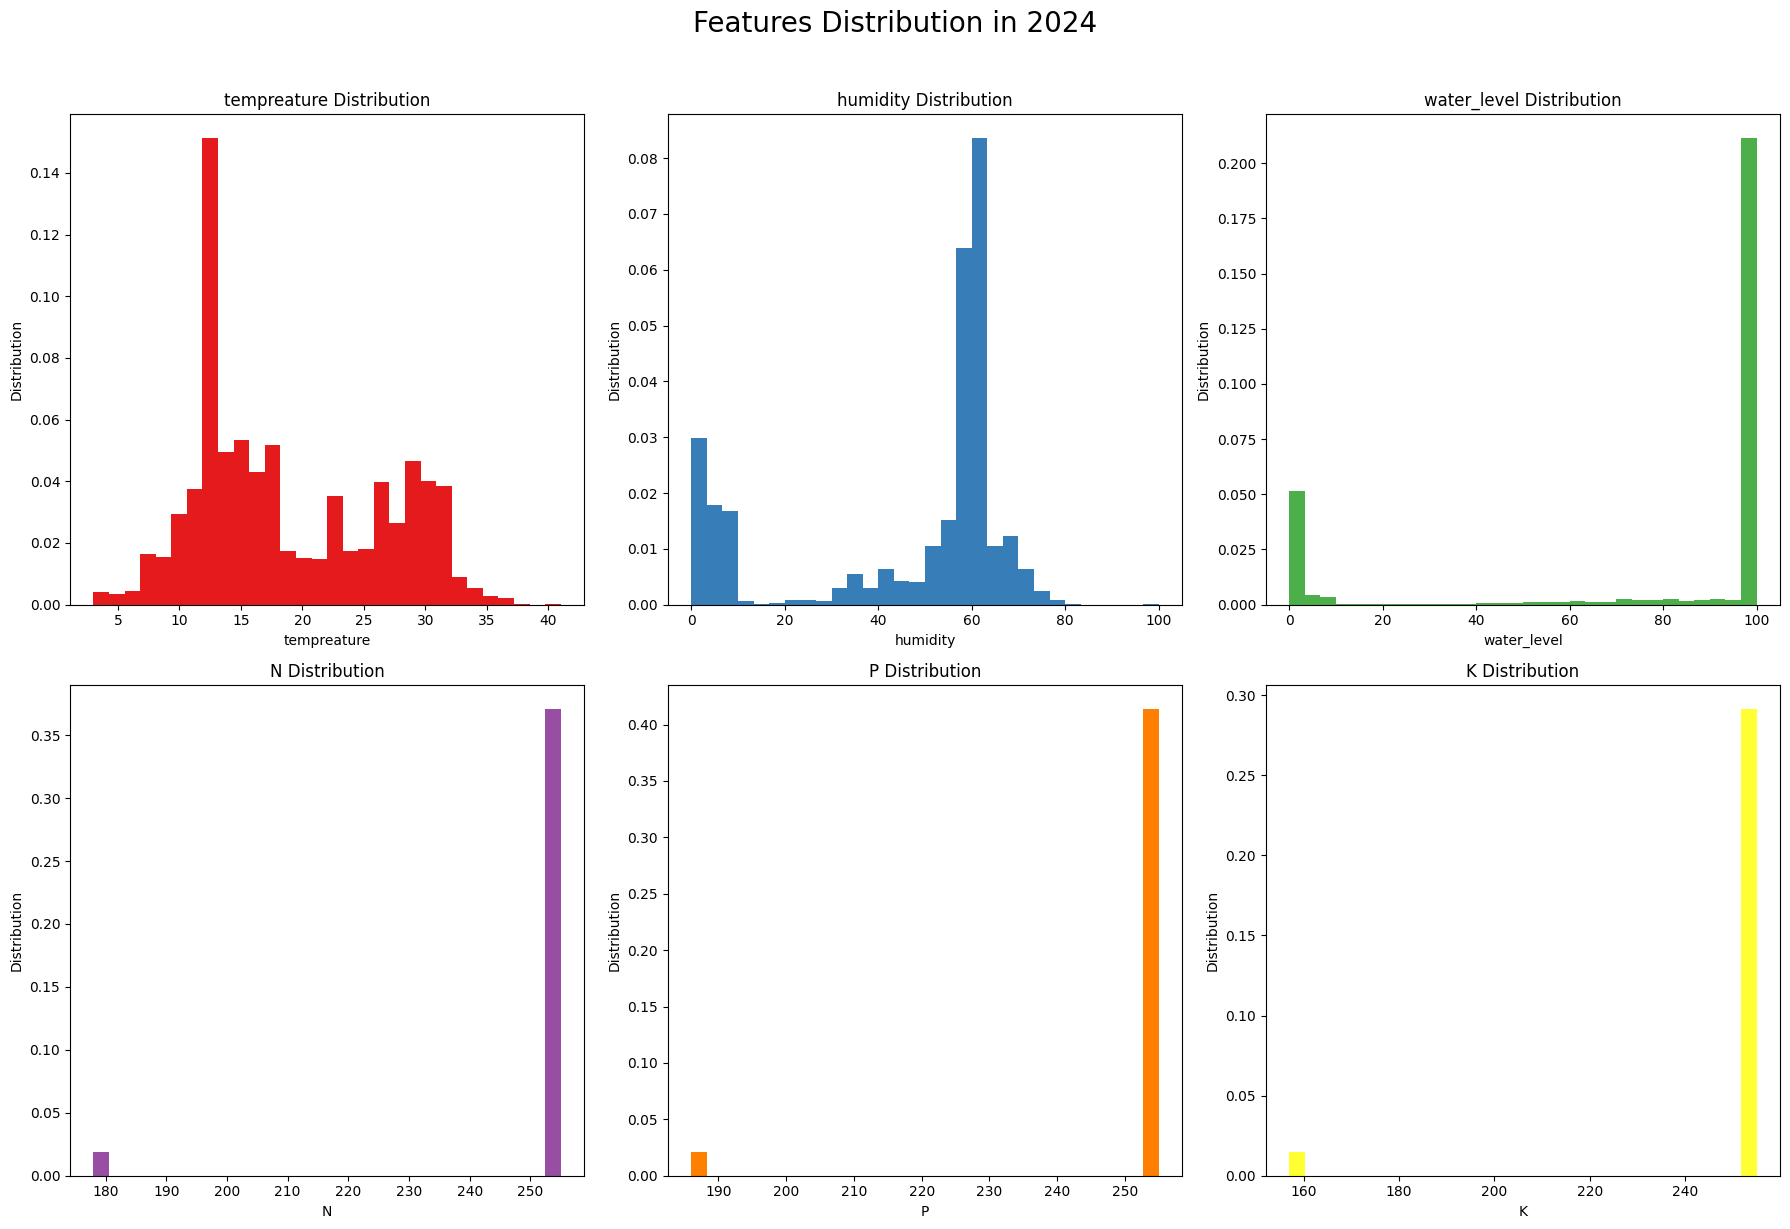

In [11]:
cleaned_data['year'] = cleaned_data['date'].dt.year

year_order = sorted(cleaned_data['year'].dropna().unique())

for year in year_order:
    year_data = cleaned_data[cleaned_data['year'] == year]
    if not year_data.empty:
        plot_features(year_data, *numeric_columns, title=f'Features Distribution in {int(year)}')

***Code***

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_ON,Watering_plant_pump_ON,Water_pump_actuator_ON,month,year
0,2024-02-08 06:10:00,41,63,100,255,255,255,True,False,False,February,2024.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,True,False,False,February,2024.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,True,False,False,February,2024.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,True,False,False,February,2024.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,True,False,False,February,2024.0
